In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

#for 'data (data,data)' type file
def spitdata(filename,xmin=0,xmax=math.inf,option="yes"):
    with open(filename) as f:
        rawdata = f.readlines()
    x = []
    y = []
    z = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1].split(',')[0][1:-2])
        ztemp = float(rawdata[i].split('\t')[1].split(',')[1][:-3])
        if(xtemp>xmin and xtemp<xmax):
            x.append(xtemp)
            y.append(ytemp)
            z.append(ztemp)
    if(option != "no"):
        for i in range (0, len(z)):
            if(z[i] > 0):
                z[i] = -360+z[i]
    return x,y,z

#for 'data data' type file
def spitdata2(filename,xmin=0,xmax=math.inf):
    with open(filename) as f:
        rawdata = f.readlines()
    data = []
    x = []
    y = []
    for i in range (0, len(rawdata)):
        xtemp = float(rawdata[i].split('\t')[0])
        ytemp = float(rawdata[i].split('\t')[1])
        if(xtemp > xmin and xtemp < xmax):
            x.append(xtemp)
            y.append(ytemp)
    return x,y

In [2]:
type = "LPF"

## Normal

slope:-2.9165 (x > 200k)
(Butterworth) Frequency Response


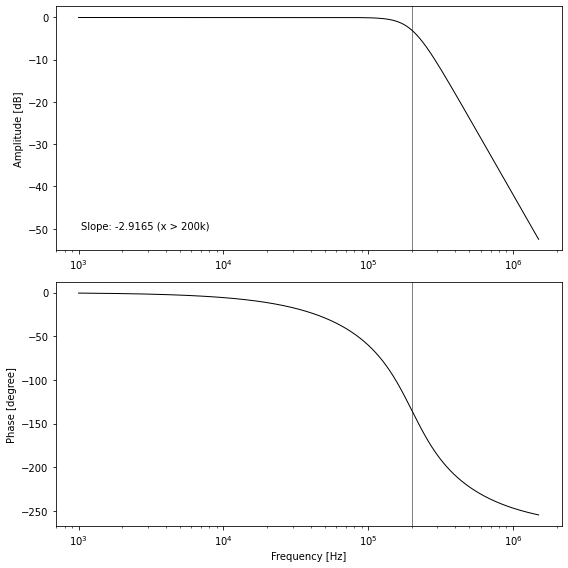

In [3]:
########## log ##########
butter_x,butter_y,butter_z = spitdata(type+"_B_f.txt",1000,1500000)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#trendline
new_x = []
new_y = []
for i in range (0, len(butter_x)):
    if(butter_x[i]>200000):
        new_x.append(butter_x[i])
        new_y.append(butter_y[i])  
butter_x_np = np.array(new_x)
butter_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(butter_x_np), butter_y_np, 1)
print("slope:"+str(round(slope/20,4))+ " (x > 200k)")

print("(Butterworth) Frequency Response")
ax1.set_xscale('log')
ax1.plot(butter_x,butter_y,c='black',linewidth=1)
ax1.set_ylabel("Amplitude [dB]")
ax1.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.text(0.05, 0.1, "Slope: "+str(round(slope/20,4))+ " (x > 200k)", verticalalignment='center', transform=ax1.transAxes)

ax2.set_xscale("log")
ax2.plot(butter_x,butter_z,c='black',linewidth=1)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/four.png")

slope:-3.3836 (x > 200k)
Chebyshev Frequency Response


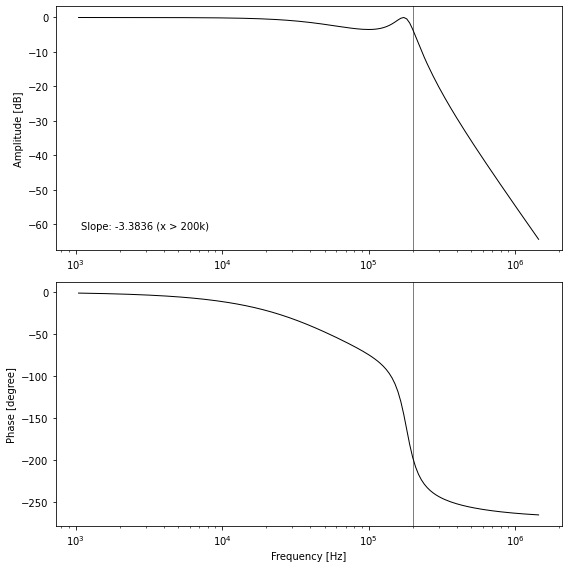

In [4]:
cheby_x,cheby_y,cheby_z = spitdata(type+"_C_f.txt",1000,1500000)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8,8), tight_layout = True)

#trendline
new_x = []
new_y = []
for i in range (0, len(cheby_x)):
    if(cheby_x[i]>200000):
        new_x.append(cheby_x[i])
        new_y.append(cheby_y[i])  
cheby_x_np = np.array(new_x)
cheby_y_np = np.array(new_y)
slope, intercept = np.polyfit(np.log10(cheby_x_np), cheby_y_np, 1)
print("slope:"+str(round(slope/20,4))+ " (x > 200k)")

print("Chebyshev Frequency Response")
ax1.set_xscale('log')
ax1.plot(cheby_x,cheby_y,c='black',linewidth=1)
ax1.set_ylabel("Amplitude [dB]")
ax1.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
ax1.text(0.05, 0.1, "Slope: "+str(round(slope/20,4))+ " (x > 200k)", verticalalignment='center', transform=ax1.transAxes)

ax2.set_xscale("log")
ax2.plot(cheby_x,cheby_z,c='black',linewidth=1)
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
#plt.savefig("figures/"+type+"/C_f.png")

(Butterworth & Chebyshev) Frequency Response


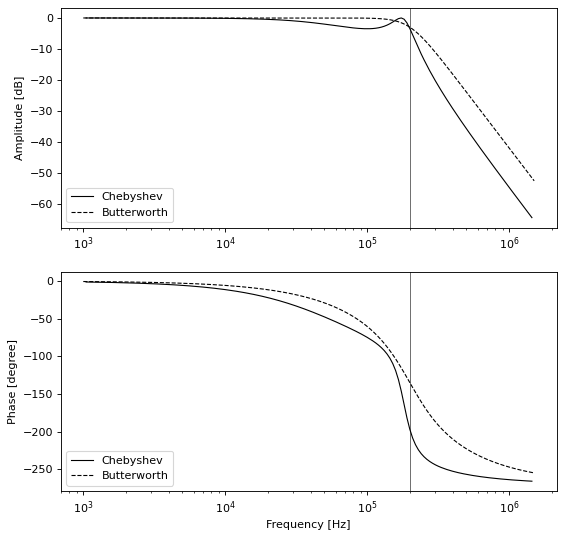

In [5]:
plt.figure(figsize=(8, 8), dpi=80)

plt.subplot(2, 1, 1)
print("(Butterworth & Chebyshev) Frequency Response")
plt.xscale('log')
plt.plot(cheby_x,cheby_y,c='black',linewidth=1)
plt.plot(butter_x,butter_y,c='black',linestyle="dashed",linewidth=1)
plt.ylabel("Amplitude [dB]")
plt.legend(["Chebyshev", "Butterworth"], loc ="lower left")
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

plt.subplot(2,1,2)
plt.xscale("log")
plt.plot(cheby_x,cheby_z,c='black',linewidth=1)
plt.plot(butter_x,butter_z,c='black',linestyle="dashed",linewidth=1)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [degree]")
plt.legend(["Chebyshev", "Butterworth"], loc ="lower left")
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

#plt.show()
plt.savefig("figures/"+type+"/BC_f.png")

Frequency Response Differential


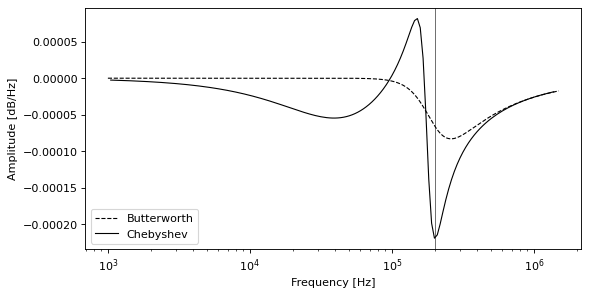

In [6]:
print("Frequency Response Differential")

#微分
butter_x,butter_y,butter_z = spitdata(type+"_B_f.txt",1000,1500000)
cheby_x,cheby_y,cheby_z = spitdata(type+"_C_f.txt",1000,1500000)

fig, ax = plt.subplots(figsize=(8.0, 4.0), dpi=80)

butter_y_dif = []
for i in range (1,len(butter_x)):
    butter_y_dif.append((butter_y[i] - butter_y[i-1])/(butter_x[i]-butter_x[i-1]))
butter_x_n = butter_x[:-1]

cheby_y_dif = []
for i in range (1,len(cheby_y)):
    cheby_y_dif.append((cheby_y[i] - cheby_y[i-1])/(cheby_x[i]-cheby_x[i-1]))
cheby_x_n = cheby_x[:-1]

plt.xscale('log')
plt.plot(butter_x_n,butter_y_dif,c='black',linewidth=1,linestyle="dashed")
plt.plot(cheby_x_n,cheby_y_dif,c='black',linewidth=1)
plt.ylabel("Amplitude [dB/Hz]")
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
plt.legend(["Butterworth", "Chebyshev"], loc ="lower left")
plt.xlabel("Frequency [Hz]")

#plt.show()
plt.savefig("figures/"+type+"/BC_f_amp_differential.png")

Phase Response Differential


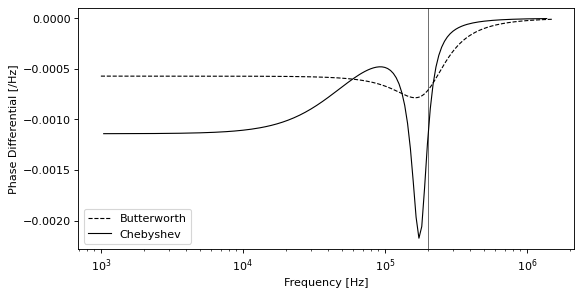

In [7]:
print("Phase Response Differential")

#微分
butter_x,butter_y,butter_z = spitdata(type+"_B_f.txt",1000,1500000)
cheby_x,cheby_y,cheby_z = spitdata(type+"_C_f.txt",1000,1500000)

fig, ax = plt.subplots(figsize=(8.0, 4.0), dpi=80)

butter_z_dif = []
for i in range (1,len(butter_x)):
    butter_z_dif.append((butter_z[i] - butter_z[i-1])/(butter_x[i]-butter_x[i-1]))
butter_x_n = butter_x[:-1]

cheby_z_dif = []
for i in range (1,len(cheby_z)):
    cheby_z_dif.append((cheby_z[i] - cheby_z[i-1])/(cheby_x[i]-cheby_x[i-1]))
cheby_x_n = cheby_x[:-1]

plt.xscale('log')
plt.plot(butter_x_n,butter_z_dif,c='black',linewidth=1,linestyle="dashed")
plt.plot(cheby_x_n,cheby_z_dif,c='black',linewidth=1)
plt.ylabel("Phase Differential [/Hz]")
plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)
plt.legend(["Butterworth", "Chebyshev"], loc ="lower left")
plt.xlabel("Frequency [Hz]")

#plt.show()
plt.savefig("figures/"+type+"/BC_f_phase_differential.png")

(Butterworth) Step Response


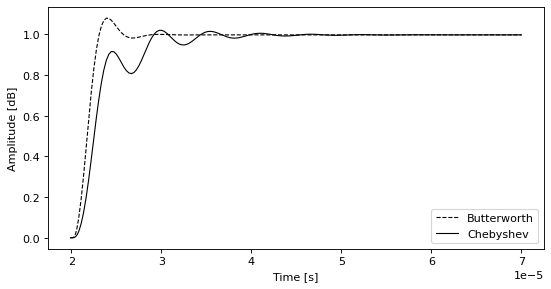

In [8]:
plt.figure(figsize=(8, 4), dpi=80)

butter_x,butter_y = spitdata2(type+"_B_s.txt",xmax = 1.06*10**(-3))
#butter_x.insert(0,0.00099)
#butter_y.insert(0,0)
print("(Butterworth) Step Response")
plt.plot(butter_x,butter_y,c='black',linewidth=1,linestyle='dashed')
plt.ylabel("Amplitude [dB]")

cheby_x,cheby_y = spitdata2(type+"_C_s.txt",xmax = 1.06*10**(-3))
#print("LPF(Chebyshev) Step Response")
plt.plot(cheby_x,cheby_y,c='black',linewidth=1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude [dB]")
plt.legend(["Butterworth", "Chebyshev"], loc ="lower right")

#plt.show()
plt.savefig("figures/"+type+"/BC_s.png")

In [9]:
# butter_x,butter_y,butter_z = spitdata(type+"_B_f.txt",xmin=1000,xmax=1500000)
# cheby_x,cheby_y,cheby_z = spitdata(type+"_C_f.txt",xmin=1000,xmax=1500000)

# plt.figure(figsize=(8, 4), dpi=80)

# butter_z_tan = [np.tan(np.radians(i)) for i in butter_z]
# cheby_z_tan = [np.tan(np.radians(i)) for i in cheby_z]

# #for i in range (0, len(cheby_z_tan)):
# #    if(cheby_x[i]>50000 and cheby_x[i] < 200000):
# #        print(i, cheby_z_tan[i])
    

# #plt.xscale("log")
# plt.plot(cheby_x[:104],cheby_z_tan[:104],c='black',linewidth=1)
# plt.plot(butter_x[:10752],butter_z_tan[:10752],c='black',linestyle="dashed",linewidth=1)
# plt.plot(cheby_x[105:],cheby_z_tan[105:],c='black',linewidth=1)
# plt.plot(butter_x[10753:],butter_z_tan[10753:],c='black',linestyle="dashed",linewidth=1)

# for i in range (0, len(butter_x)):
#     if(butter_x[i]>200000):
#         new_x.append(butter_x[i])
#         new_y.append(butter_y[i])  
# butter_x_np = np.array(new_x)
# butter_y_np = np.array(new_y)
# butter_x_np_small = [i/100000000 for i in butter_x_np]
# butter_y_np_tan = [np.tan(np.radians(i)) for i in butter_y_np]
# slope, intercept = np.polyfit(butter_x_np_small, butter_y_np_tan, 1)
# print("Butterworth slope:"+str(round(slope/20,4))+ "*10^-8 (x > 200k)")

# for i in range (0, len(cheby_x)):
#     if(cheby_x[i]>200000):
#         new_x.append(cheby_x[i])
#         new_y.append(cheby_y[i])  
# cheby_x_np = np.array(new_x)
# cheby_y_np = np.array(new_y)
# slope, intercept = np.polyfit(cheby_x_np/100000000, np.tan(np.radians(cheby_y_np)), 1)
# print("Chebyshev slope:"+str(round(slope/20,4))+ "*10^-8 (x > 200k)")

# plt.xlabel("Frequency [Hz]")
# plt.ylabel("Phase Tangent")
# plt.ylim(-10,10)
# plt.legend(["Chebyshev", "Butterworth"], loc ="upper right")
# plt.axvline(200000,ymin=0,ymax=1,c='black',linewidth=0.5)

# #plt.show()
# plt.savefig("figures/"+type+"/BC_f_phase_tangent.png")